
<h2 align='center'> MÔN HỌC: KỸ NGHỆ TRI THỨC VÀ HỌC MÁY (7080510) </h2>

---
* Giảng viên: Đặng Văn Nam
* Email: dangvannam@humg.edu.vn

---
* Họ tên sinh viên: Trịnh Thế Vũ
* Mã sinh viên: 1821050886
* Lớp/Nhóm môn học:03
* Email:trinhvuthe@gmail.com
---

## CHƯƠNG 4: HỌC KHÔNG GIÁM SÁT - UNSUPERVISED LEARNING
---


## THỰC HÀNH 10
---
Mô tả tập dữ liệu: Data_sales_Excercise.csv. Dữ liệu mua hàng của 200 MiniMart với một nhà phân phối hàng hóa trong năm 2019. Trong đó:
* Cột No: Mã của MiniMart
* Cột City: Ký hiệu khu vực đặt MiniMart
* Cột Distance: Khoảng cách từ MiniMart tới nhà phân phối.
* Cột Grocery: Số tiền MiniMart đã dùng để mua hàng tạp hóa trong năm 2019.
* Cột Milk: Số tiền mà MiniMart đã dùng để mua sữa từ nhà phân phối trong năm 2019

**YÊU CẦU:**
Sử dụng thuật toán phân cụm Kmeans cho tập dữ liệu với 2 thuộc tính phân cụm: Grocery, Milk:
1. Xác định số cụm tối ưu.
2. Thực hiện phân cụm dữ liệu với số cụm tối ưu đã chỉ ra ở yêu cầu 1. Trực quan hóa, Liệt kê danh sách MiniMart theo từng cụm và cho nhận xét.


In [30]:
#{SINH VIÊN THỰC HIỆN TẠI ĐÂY}
# Khai báo thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Đọc tập dữ liệu
path = "data/Data_sales_Excercise.csv"
df_sale = pd.read_csv(path)
df_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   City      200 non-null    object
 2   Distance  200 non-null    int64 
 3   Grocery   200 non-null    int64 
 4   Milk      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [31]:
#Hiển thị 5 bản ghi đầu tiên:
df_sale.head()

,No,City,Distance,Grocery,Milk
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [32]:
#Quan sát các đặc trưng thống kê:
df_sale.describe()

,No,Distance,Grocery,Milk
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,46.155000,53620.500000,5954.375000
std,57.879185,17.492309,34855.146477,1777.210276
min,1.000000,19.000000,0.000000,2600.000000
25%,50.750000,30.000000,26575.000000,4550.000000
50%,100.500000,47.000000,46400.000000,5775.000000
75%,150.250000,63.000000,78225.000000,7431.250000
max,200.000000,75.000000,143500.000000,10075.000000


In [33]:
#Quan sát thống kê thuộc tính:
df_sale['Grocery'].describe()

count       200.000000
mean      53620.500000
std       34855.146477
min           0.000000
25%       26575.000000
50%       46400.000000
75%       78225.000000
max      143500.000000
Name: Grocery, dtype: float64

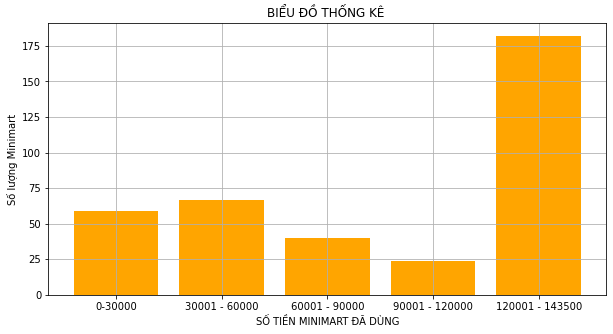

In [34]:
#Trực quan hóa dữ liệu theo từng nhóm:
gr1 = df_sale["Grocery"][(df_sales["Grocery"] >= 0) & (df_sales["Grocery"] <= 30000)]
gr2 = df_sale["Grocery"][(df_sales["Grocery"] >= 30001) & (df_sales["Grocery"] <= 60000)]
gr3 = df_sale["Grocery"][(df_sales["Grocery"] >= 60001) & (df_sales["Grocery"] <= 90000)]
gr4 = df_sale["Grocery"][(df_sales["Grocery"] >= 90001) & (df_sales["Grocery"] <= 120000)]
gr5 = df_sale["Grocery"][(df_sales["Grocery"] >= 12000) & (df_sales["Grocery"] <= 143500)]


grx = ["0-30000", "30001 - 60000", "60001 - 90000", "90001 - 120000", "120001 - 143500"]
gry = [len(gr1.values), len(gr2.values), len(gr3.values), len(gr4.values), len(gr5.values)]

plt.figure(figsize=(10,5))
plt.bar(grx, gry, color='orange')
plt.title("BIỂU ĐỒ THỐNG KÊ ")
plt.xlabel("SỐ TIỀN MINIMART ĐÃ DÙNG")
plt.ylabel("Số lượng Minimart")
plt.grid(True)
plt.show()

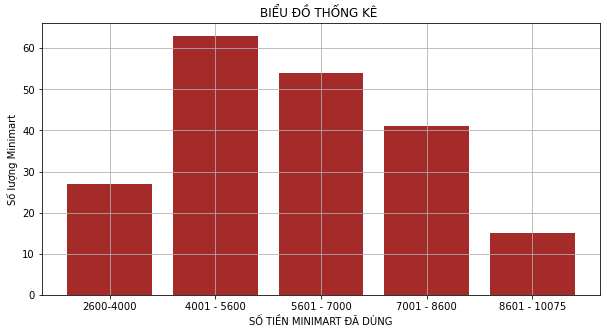

In [36]:
#Trực quan hóa dữ liệu theo từng nhóm:
mk1 = df_sale["Milk"][(df_sales["Milk"] >= 2600) & (df_sales["Milk"] <= 4000)]
mk2 = df_sale["Milk"][(df_sales["Milk"] >= 4001) & (df_sales["Milk"] <= 5600)]
mk3 = df_sale["Milk"][(df_sales["Milk"] >= 5601) & (df_sales["Milk"] <= 7000)]
mk4 = df_sale["Milk"][(df_sales["Milk"] >= 7001) & (df_sales["Milk"] <= 8600)]
mk5 = df_sale["Milk"][(df_sales["Milk"] >= 8601) & (df_sales["Milk"] <= 10075)]


mkx = ["2600-4000", "4001 - 5600", "5601 - 7000", "7001 - 8600", "8601 - 10075"]
mky = [len(mk1.values), len(mk2.values), len(mk3.values), len(mk4.values), len(mk5.values)]

plt.figure(figsize=(10,5))
plt.bar(mkx, mky, color='brown')
plt.title("BIỂU ĐỒ THỐNG KÊ ")
plt.xlabel("SỐ TIỀN MINIMART ĐÃ DÙNG")
plt.ylabel("Số lượng Minimart")
plt.grid(True)
plt.show()

In [37]:
#Quan sát thống kê thuộc tính Milk:
df_sale['Milk'].describe()

count      200.000000
mean      5954.375000
std       1777.210276
min       2600.000000
25%       4550.000000
50%       5775.000000
75%       7431.250000
max      10075.000000
Name: Milk, dtype: float64

In [38]:
#Sử dụng 2 thuộc tính Grocery, milk để phân cụm dữ liệu
data_sales = df_sale.iloc[:,3:]
data_sales.head()

,Grocery,Milk
0,69900,6325
1,79000,5200
2,85500,7825
3,17100,8375
4,5500,5450


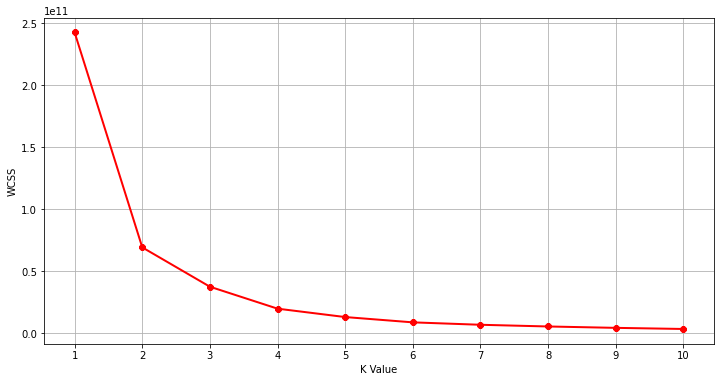

In [40]:
from sklearn.cluster import KMeans
wcss = []
#Thử số cụm (n_clusters) thay đổi từ 1 đến 10
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(data_sales)
    wcss.append(kmeans.inertia_)

#Trực quan hóa lên biểu đồ:
plt.figure(figsize=(12,6))    
plt.grid(True)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [41]:
from sklearn.cluster import KMeans

#Thực hiện phân thành 4 cụm, các tham số khác sử dụng mặc định
model_km = KMeans(n_clusters=4)

#Liệt kê các tham số của mô hình
model_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [43]:
model_km.fit_predict(data_sales)

#Tạo cột Cluster để cho biết mẫu thuộc cụm nào
df_sales["Cluster"] = model_km.labels_
df_sales

,No,City,Distance,Grocery,Milk,Cluster
0,1,K,60,69900,6325,0
1,2,K,30,79000,5200,0
2,3,E,52,85500,7825,0
3,4,E,57,17100,8375,1
4,5,E,55,5500,5450,1
...,...,...,...,...,...,...
195,196,E,22,96600,7900,0
196,197,E,39,83700,7675,0
197,198,K,25,34000,4000,3
198,199,K,30,42000,5500,3


3    68
1    60
0    52
2    20
Name: Cluster, dtype: int64


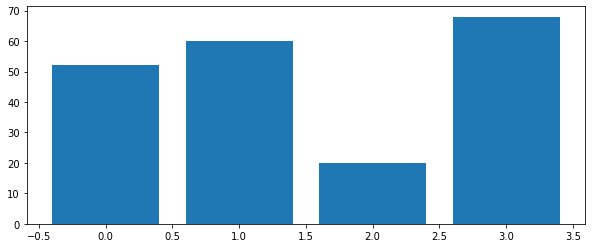

In [44]:
#Thống kê số lượng minimart theo mỗi cụm:
sum_cluster = df_sales.Cluster.value_counts()
print(sum_cluster)

#Trực quan hóa dữ liệu
plt.figure(figsize=(10,4))
plt.bar(sum_cluster.index, sum_cluster.values)
plt.show()


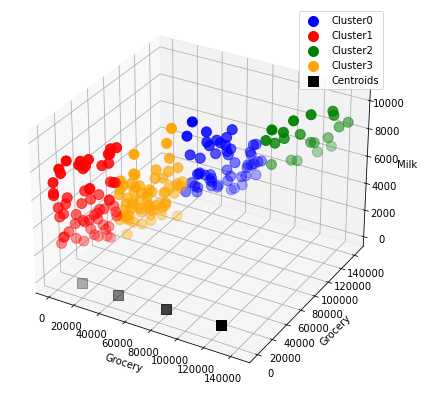

In [45]:
#Trực quan hóa phân cụm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_sales.Grocery[df_sales.Cluster == 0], df_sales["Grocery"][df_sales.Cluster == 0], df_sales["Milk"][df_sales.Cluster == 0], c='blue', s=100,label='Cluster0')
ax.scatter(df_sales.Grocery[df_sales.Cluster == 1], df_sales["Grocery"][df_sales.Cluster == 1], df_sales["Milk"][df_sales.Cluster == 1], c='red', s=100,label='Cluster1')
ax.scatter(df_sales.Grocery[df_sales.Cluster == 2], df_sales["Grocery"][df_sales.Cluster == 2], df_sales["Milk"][df_sales.Cluster == 2], c='green', s=100,label='Cluster2')
ax.scatter(df_sales.Grocery[df_sales.Cluster == 3], df_sales["Grocery"][df_sales.Cluster == 3], df_sales["Milk"][df_sales.Cluster == 3], c='orange', s=100,label='Cluster3')
ax.scatter(model_km.cluster_centers_[:, 0], 
           model_km.cluster_centers_[:, 1],
           color = 'black', label = 'Centroids',s=100,marker='s')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

In [48]:
# Hiển thị các cluster :
cluster = kmeans.cluster_centers_
print(cluster)

[[ 41586.66666667   4983.33333333]
 [ 83288.23529412   6964.70588235]
 [ 16040.           5159.        ]
 [132860.           8207.5       ]
 [ 29393.93939394   5334.09090909]
 [112388.88888889   7758.33333333]
 [ 96093.33333333   6671.66666667]
 [  3466.66666667   5453.33333333]
 [ 70857.14285714   6734.52380952]
 [ 54724.           5711.        ]]


In [49]:
#Vị trí tâm của các cụm
np.round(model_km.cluster_centers_,1)

array([[ 81588.5,   6765.4],
       [ 16483.3,   5422.9],
       [122140. ,   8000. ],
       [ 44848.5,   5201.5]])

In [50]:
#Tổng bình phương khoảng cách từ các mẫu tới trung tâm cụm gần nhất.
model_km.inertia_

19660743423.029774

In [51]:
#Danh sách khách hàng nhóm 0
cluster_0 = df_sales[df_sales.Cluster== 0]
cluster_0.reset_index(inplace=True)
cluster_0[['No','City','Distance','Grocery','Milk', 'Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,1,K,60,69900,6325,0
1,2,K,30,79000,5200,0
2,3,E,52,85500,7825,0
3,8,E,20,69000,5050,0
4,12,E,21,95800,6475,0
5,15,K,68,83000,8125,0
6,17,E,72,91300,5125,0
7,19,K,26,79500,5325,0
8,20,E,60,66400,5775,0
9,23,E,41,90900,5725,0


In [52]:
#Đặc trưng thống kê của thuộc tính phân cụm khách hàng nhóm 0
cluster_0[['Grocery','Milk']].describe()

,Grocery,Milk
count,52.000000,52.000000
mean,81588.461538,6765.384615
std,10691.093120,1322.552807
min,63500.000000,4875.000000
25%,73425.000000,5725.000000
50%,81700.000000,6437.500000
75%,91000.000000,7787.500000
max,100700.000000,10075.000000


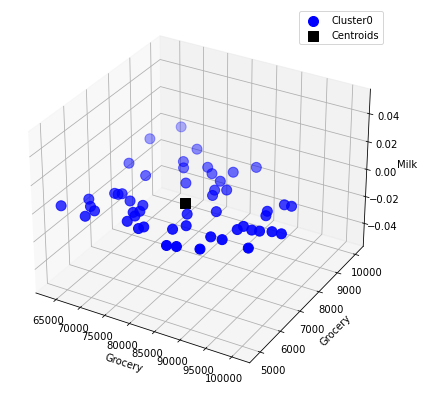

In [53]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_0['Grocery'], cluster_0["Milk"], c='blue', s=100,label='Cluster0')
ax.scatter(model_km.cluster_centers_[0, 0], model_km.cluster_centers_[0, 1], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

## Nhóm 1
---

In [54]:
#Danh sách nhóm 0
cluster_1 = df_sales[df_sales.Cluster== 1]
cluster_1.reset_index(inplace=True)
cluster_1[['No','City','Distance','Grocery','Milk', 'Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,4,E,57,17100,8375,1
1,5,E,55,5500,5450,1
2,6,E,68,27200,8550,1
3,7,E,41,20500,4500,1
4,9,K,33,13200,8325,1
5,14,E,46,29800,4100,1
6,18,K,20,9800,3950,1
7,21,K,49,25900,3400,1
8,22,K,22,0,7075,1
9,27,E,66,26400,5325,1


In [55]:
#Đặc trưng thống kê của thuộc tính phân cụm nhóm 0
cluster_1[['Grocery','Milk']].describe()

,Grocery,Milk
count,60.000000,60.000000
mean,16483.333333,5422.916667
std,9337.098716,1943.994946
min,0.000000,2600.000000
25%,9000.000000,3968.750000
50%,17100.000000,5275.000000
75%,25150.000000,6718.750000
max,30500.000000,8950.000000


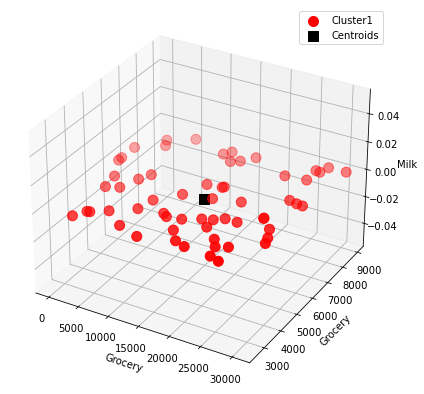

In [56]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_1['Grocery'], cluster_1["Milk"], c='red', s=100,label='Cluster1')
ax.scatter(model_km.cluster_centers_[1, 0], model_km.cluster_centers_[1, 1], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

## Nhóm 2:
---

In [57]:
#Danh sách nhóm 0
cluster_2 = df_sales[df_sales.Cluster== 2]
cluster_2.reset_index(inplace=True)
cluster_2[['No','City','Distance','Grocery','Milk', 'Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,16,K,35,143500,8650,2
1,25,E,56,126800,7500,2
2,40,E,66,111300,8525,2
3,41,E,51,102700,8100,2
4,50,E,63,118500,6350,2
5,53,E,60,105600,8800,2
6,54,K,55,139000,8400,2
7,61,K,70,125000,7550,2
8,77,E,28,107200,7825,2
9,85,E,68,135500,7075,2


In [58]:
#Đặc trưng thống kê của thuộc tính phân cụm nhóm 0
cluster_2[['Grocery','Milk']].describe()

,Grocery,Milk
count,20.000000,20.00000
mean,122140.000000,8000.00000
std,12517.078859,1034.75779
min,102700.000000,6325.00000
25%,111675.000000,7393.75000
50%,122250.000000,8087.50000
75%,134150.000000,8687.50000
max,143500.000000,9575.00000


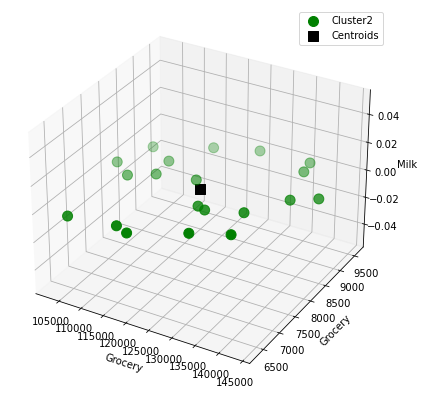

In [59]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_2['Grocery'], cluster_2["Milk"], c='green', s=100,label='Cluster2')
ax.scatter(model_km.cluster_centers_[2, 0], model_km.cluster_centers_[2, 1], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()

## Nhóm 3
---

In [60]:
#Danh sách nhóm 3
cluster_3 = df_sales[df_sales.Cluster== 3]
cluster_3.reset_index(inplace=True)
cluster_3[['No','City','Distance','Grocery','Milk', 'Cluster']]

,No,City,Distance,Grocery,Milk,Cluster
0,10,E,37,31800,5975,3
1,11,K,33,59200,5700,3
2,13,E,48,46200,3850,3
3,24,K,30,51800,4300,3
4,26,K,56,40800,5000,3
...,...,...,...,...,...,...
63,191,E,57,44700,5450,3
64,193,K,74,39200,5975,3
65,198,K,25,34000,4000,3
66,199,K,30,42000,5500,3


In [61]:
#Đặc trưng thống kê của thuộc tính phân cụm nhóm 0
cluster_3[['Grocery','Milk']].describe()

,Grocery,Milk
count,68.000000,68.000000
mean,44848.529412,5201.470588
std,8856.863308,1352.891337
min,31200.000000,2675.000000
25%,37350.000000,4175.000000
50%,44750.000000,4962.500000
75%,52575.000000,5937.500000
max,61900.000000,9800.000000


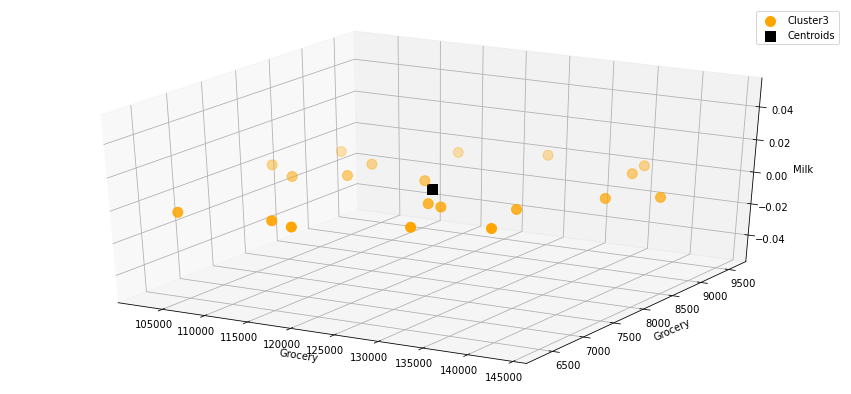

In [29]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_3['Grocery'], cluster_3["Milk"], c='orange', s=100,label='Cluster3')
ax.scatter(model_km.cluster_centers_[3, 0], model_km.cluster_centers_[3, 1], color = 'black', label = 'Centroids',s=100,marker=',')
#ax.view_init(30, 185)
plt.xlabel("Grocery")
plt.ylabel("Grocery")
ax.set_zlabel('Milk')
plt.legend()
plt.show()